# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


https://drive.google.com/file/d/1iTETd_sM_uVKIZLcz6W2cKkfgDyWiKQ-/view?usp=drive_link

https://public.tableau.com/views/Telecom_17598102796790/Dashboard2?:language=es-ES&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

Introduccion:

En este proyecto abordaremos lo siguiente: El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. 

Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. 

Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

Cargar librerias:

In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
from datetime import datetime

Inicialización:

In [2]:
telecom_clients = pd.read_csv(r"C:\Users\PC\Documents\Proyecto Final Telecom 1a Parte\telecom_clients.csv")
telecom_dataset = pd.read_csv(r'C:\Users\PC\Documents\Proyecto Final Telecom 1a Parte\telecom_dataset_new.csv')
print(telecom_clients.info ())
print(telecom_clients.head())
print(telecom_dataset.head())
print(telecom_dataset.info ())
# print(telecom_dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None
   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16
   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False    

Idenficando valores nulo

In [3]:
print(telecom_dataset.isna().sum())
print()
print('Cantidad de operadores unicos:', telecom_dataset['operator_id'].nunique())

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Cantidad de operadores unicos: 1092


Existen un 15% de valores nulos sin identificar el operador, demasiados para mi percepcion como para eliminarlos, por lo que sustituire los NAN en el campo de operador_id por 000000.0 y los registros NAN en el campo internal seran eliminados, esos si que no afectaran el resultado en losanalisis siguientes.

In [4]:
telecom_dataset_clean = telecom_dataset
telecom_dataset_clean['operator_id'] = telecom_dataset_clean['operator_id'].fillna('000000.0')
telecom_dataset_clean.dropna(inplace = True)
telecom_dataset_clean.reset_index(inplace = True, drop = True)
print(telecom_dataset_clean.isna().sum())
telecom_dataset_clean.info()
filas_con_nan = telecom_dataset_clean[telecom_dataset_clean.isna().any(axis=1)]
print(filas_con_nan)

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53785 entries, 0 to 53784
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              53785 non-null  int64 
 1   date                 53785 non-null  object
 2   direction            53785 non-null  object
 3   internal             53785 non-null  object
 4   operator_id          53785 non-null  object
 5   is_missed_call       53785 non-null  bool  
 6   calls_count          53785 non-null  int64 
 7   call_duration        53785 non-null  int64 
 8   total_call_duration  53785 non-null  int64 
dtypes: bool(1), int64(4), object(4)
memory usage: 3.3+ MB
Empty DataFrame
Columns: [user_id, date, direction, inte

In [5]:
# Enriqueciendo los datos
telecom_dataset_clean['date'] = pd.to_datetime(telecom_dataset_clean['date']) # Requisito convertir la columa a datetime desde object para poder separar o crear nuevas columnas con los datos datetime
telecom_dataset_clean.info()
telecom_dataset_clean['only_date'] = telecom_dataset_clean['date'].dt.date
telecom_dataset_clean['month'] = telecom_dataset_clean['date'].dt.month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53785 entries, 0 to 53784
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53785 non-null  int64                    
 1   date                 53785 non-null  datetime64[ns, UTC+03:00]
 2   direction            53785 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          53785 non-null  object                   
 5   is_missed_call       53785 non-null  bool                     
 6   calls_count          53785 non-null  int64                    
 7   call_duration        53785 non-null  int64                    
 8   total_call_duration  53785 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), int64(4), object(3)
memory usage: 3.3+ MB


In [6]:
print(telecom_dataset_clean.head())

   user_id                      date direction internal operator_id  \
0   166377 2019-08-04 00:00:00+03:00        in    False    000000.0   
1   166377 2019-08-05 00:00:00+03:00       out     True    880022.0   
2   166377 2019-08-05 00:00:00+03:00       out     True    880020.0   
3   166377 2019-08-05 00:00:00+03:00       out     True    880020.0   
4   166377 2019-08-05 00:00:00+03:00       out    False    880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  \
0            True            2              0                    4   
1            True            3              0                    5   
2            True            1              0                    1   
3           False            1             10                   18   
4            True            3              0                   25   

    only_date  month  
0  2019-08-04      8  
1  2019-08-05      8  
2  2019-08-05      8  
3  2019-08-05      8  
4  2019-08-05      8  


No se encuentra ninguna otra irregularidad en los datos por lo que pocedemos a iniciar con el analis de la informacion.

Parametros de ineficiencia:
1. ¿El operador tiene una gran cantidad de llamadas entrantes perdidas (internas y externas)?
2. ¿El operador tiene un tiempo de espera prolongado para las llamadas entrantes?
3. ¿El operador que debe realizar llamadas salientes, tiene un número reducido de ellas?

In [7]:
operator_call_missed = telecom_dataset_clean[telecom_dataset_clean['is_missed_call']==True]
print(operator_call_missed)

       user_id                      date direction internal operator_id  \
0       166377 2019-08-04 00:00:00+03:00        in    False    000000.0   
1       166377 2019-08-05 00:00:00+03:00       out     True    880022.0   
2       166377 2019-08-05 00:00:00+03:00       out     True    880020.0   
4       166377 2019-08-05 00:00:00+03:00       out    False    880022.0   
6       166377 2019-08-05 00:00:00+03:00       out    False    880020.0   
...        ...                       ...       ...      ...         ...   
53773   168606 2019-11-08 00:00:00+03:00       out    False    957922.0   
53774   168606 2019-11-08 00:00:00+03:00        in    False    957922.0   
53776   168606 2019-11-08 00:00:00+03:00        in    False    000000.0   
53780   168606 2019-11-10 00:00:00+03:00       out     True    957922.0   
53784   168606 2019-11-19 00:00:00+03:00        in    False    000000.0   

       is_missed_call  calls_count  call_duration  total_call_duration  \
0                True    

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buena organización en la carga y limpieza de datos. La gestión de valores nulos y la conversión de fechas muestran comprensión sólida del proceso de preparación antes del análisis. Gran inicio de proyecto.  
</div>


In [8]:
# Calcula el número de llamadas perdidas cada operador al mes. Guarda el resultado.
columns = ['operator_id']
df_operator_call_missed = operator_call_missed.groupby(columns)['user_id'].agg(['count']).reset_index()
df_operator_call_missed = df_operator_call_missed.rename(columns={'count': 'call_missed'})
call_missed = df_operator_call_missed.sort_values(by='call_missed')
print(call_missed.head(15))
call_missed.info()
print(call_missed['call_missed'].unique())
print()
variance_call_missed = np.var(call_missed['call_missed']) # calcula la varianza aquí
print('La varianza es:', variance_call_missed)
call_missed.describe()

    operator_id  call_missed
875    973120.0            1
813    958458.0            1
784    954284.0            1
785    954318.0            1
777    952916.0            1
831    960674.0            1
829    960670.0            1
824    959596.0            1
793    955068.0            1
796    955164.0            1
70     891918.0            1
72     891970.0            1
760    951490.0            1
750    949420.0            1
747    948288.0            1
<class 'pandas.core.frame.DataFrame'>
Index: 877 entries, 875 to 876
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   operator_id  877 non-null    object
 1   call_missed  877 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 20.6+ KB
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43  

,call_missed
count,877.000000
mean,26.807298
std,270.147846
min,1.000000
25%,3.000000
50%,10.000000
75%,24.000000
max,7993.000000


<Axes: xlabel='call_missed', ylabel='operator_id'>

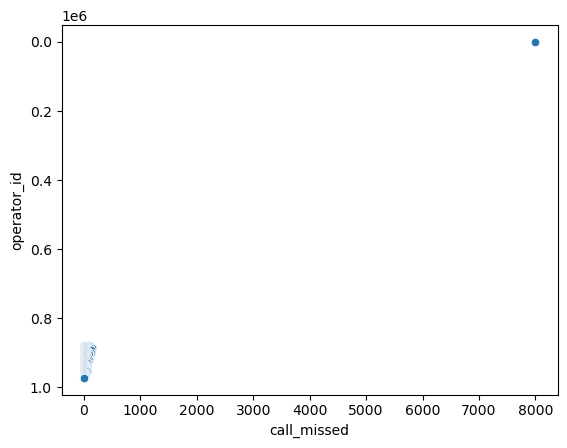

In [9]:
sns.scatterplot(data=df_operator_call_missed, x="call_missed", y='operator_id' )

En los analisis siguientes es necesario eliminar el valor maximo de la tabla, el cual afectaria los resultados de los analisis subsecuentes, un solo valor atipico.
En relacion a las llamadas perdidas considero que un operador eficiente no estara siempre por encima del 50%, en este caso 10 llamadas, recordando que estamos hablando de un periodo de 4 meses, lo que nos dara un promedio de menos de 3 llamdas perdidas por mes.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente análisis estadístico. Lograste identificar correctamente la varianza, los valores atípicos y establecer un criterio lógico para la eficiencia del operador. La interpretación es clara y bien fundamentada.  
</div>


In [10]:
# Calcula el tiempo de espera prolongado para las llamadas entrantes de cada operador por mes. Guarda el resultado
telecom_dataset_clean['time_wait_call'] = telecom_dataset_clean['total_call_duration'] - telecom_dataset_clean['call_duration']
columns = ['operator_id']
df_operator_call_longtime_wait = telecom_dataset_clean.groupby(columns)['time_wait_call'].agg(['count']).reset_index()
df_operator_call_longtime_wait = df_operator_call_longtime_wait.rename(columns={'count': 'longtime_wait'})
call_longtime_wait = df_operator_call_longtime_wait.sort_values(by='longtime_wait')
print(call_longtime_wait.head(15))
call_longtime_wait.info()
print(call_longtime_wait['longtime_wait'].unique())
print()
variance_call_longtime_wait = np.var(call_longtime_wait['longtime_wait']) # calcula la varianza aquí
print('La varianza es:', variance_call_longtime_wait)
call_longtime_wait.describe()


     operator_id  longtime_wait
1091    973286.0              1
1080    970258.0              1
528     924572.0              1
522     923744.0              1
530     924662.0              1
967     953940.0              1
604     930692.0              1
597     930582.0              1
355     911152.0              1
315     908180.0              1
306     907998.0              1
350     911104.0              1
332     909896.0              1
331     909894.0              1
326     909452.0              1
<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 1091 to 1092
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   operator_id    1093 non-null   object
 1   longtime_wait  1093 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   3

,longtime_wait
count,1093.000000
mean,49.208600
std,250.090772
min,1.000000
25%,6.000000
50%,21.000000
75%,54.000000
max,8115.000000


<Axes: xlabel='longtime_wait', ylabel='operator_id'>

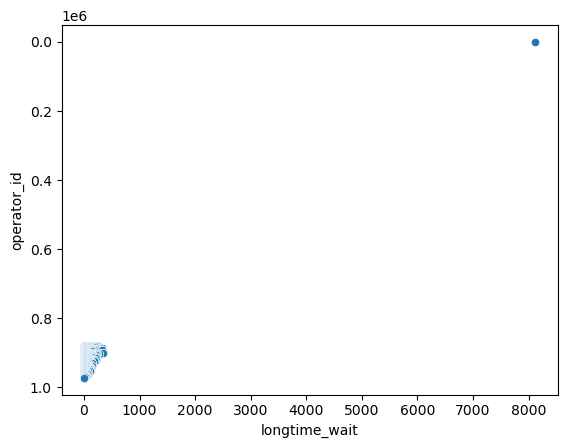

In [11]:
sns.scatterplot(data=df_operator_call_longtime_wait, x="longtime_wait", y='operator_id' )

En los analisis siguientes es necesario eliminar el valor maximo de la tabla, el cual afectaria los resultados de los analisis subsecuentes, un solo valor atipico por encima de 8 mil, asi sean segundos como tiempo de espera.
Entendere que los tiempos indicados por el cliente se refiere a minutos que dura la llamada, por lo que en el caso del tiempo de espera para los clientes, de parte de un operador eficiente no seria por encima del 25% del tiempo, en este caso 6 minutos.

In [12]:
# Para los operadores que deben hacer llamadas, valida si tiene un número reducido de ellas. Guarda el resultado
# operator_call_out = telecom_dataset_clean.query("direction == 'out' and internal == False") OPCION CORTA

# Verificar los valores únicos primero
print("Valores en 'direction':")
print(telecom_dataset_clean['direction'].unique())

print("\nValores en 'internal':")
print(telecom_dataset_clean['internal'].unique())

# Aplicar el filtro
operator_call_out = telecom_dataset_clean[(telecom_dataset_clean['direction']=='out') & (telecom_dataset_clean['internal']==False)]

print(f"\nFilas originales: {len(telecom_dataset_clean)}")
print(f"Filas filtradas: {len(operator_call_out)}")

print(operator_call_out)

Valores en 'direction':
['in' 'out']

Valores en 'internal':
[False True]

Filas originales: 53785
Filas filtradas: 26483
       user_id                      date direction internal operator_id  \
4       166377 2019-08-05 00:00:00+03:00       out    False    880022.0   
5       166377 2019-08-05 00:00:00+03:00       out    False    880020.0   
6       166377 2019-08-05 00:00:00+03:00       out    False    880020.0   
8       166377 2019-08-05 00:00:00+03:00       out    False    880020.0   
10      166377 2019-08-06 00:00:00+03:00       out    False    881278.0   
...        ...                       ...       ...      ...         ...   
53770   168603 2019-11-21 00:00:00+03:00       out    False    959118.0   
53771   168603 2019-11-27 00:00:00+03:00       out    False    959118.0   
53773   168606 2019-11-08 00:00:00+03:00       out    False    957922.0   
53775   168606 2019-11-08 00:00:00+03:00       out    False    957922.0   
53778   168606 2019-11-09 00:00:00+03:00       out   

In [13]:
columns = ['operator_id']
df_operator_call_out = operator_call_out.groupby(columns)['calls_count'].agg(['count']).reset_index()
df_operator_call_out = df_operator_call_out.rename(columns={'count': 'calls_maked'})
low_calls_out = df_operator_call_out.sort_values(by='calls_maked')
print(low_calls_out)
print(low_calls_out.info())
print(low_calls_out['calls_maked'].unique())
print()
variance_low_calls_out = np.var(low_calls_out['calls_maked']) # calcula la varianza aquí
print('La varianza es:', variance_low_calls_out)
low_calls_out.describe()

    operator_id  calls_maked
34     888536.0            1
36     888540.0            1
62     891192.0            1
43     890234.0            1
63     891250.0            1
..          ...          ...
38     889410.0          175
90     893804.0          181
158    901884.0          182
157    901880.0          187
22     885876.0          214

[834 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, 34 to 22
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   operator_id  834 non-null    object
 1   calls_maked  834 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 19.5+ KB
None
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  73
  74  75  76  77 

,calls_maked
count,834.000000
mean,31.754197
std,37.344228
min,1.000000
25%,4.000000
50%,18.000000
75%,44.000000
max,214.000000


Em relacion a las llamadas realizadas por los operadores seleccionados, considero que un operador eficiente esta por encima del 75%, redordando que el pperiodo analñizaco comprende 4 meses por lo que 44 llamadas, serian pocas por mes, tan solo 11.

In [14]:
call_missed.info()
call_longtime_wait.info()
low_calls_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 877 entries, 875 to 876
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   operator_id  877 non-null    object
 1   call_missed  877 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 20.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 1091 to 1092
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   operator_id    1093 non-null   object
 1   longtime_wait  1093 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, 34 to 22
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   operator_id  834 non-null    object
 1   calls_maked  834 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 19.5+ KB


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen manejo del análisis de eficiencia operativa. Lograste combinar métricas de tiempo de espera, llamadas perdidas y actividad de salida con criterios claros y bien razonados. La estructura y precisión en los cálculos destacan.  
</div>


In [15]:
# Unir los dataframes
df_merged = pd.merge(call_missed, call_longtime_wait, on='operator_id')
df_merged = pd.merge(df_merged, low_calls_out, on='operator_id')
print(df_merged)
df_merged.info()

    operator_id  call_missed  longtime_wait  calls_maked
0      973120.0            1              2            2
1      954318.0            1              2            1
2      952916.0            1              5            4
3      960670.0            1              2            2
4      959596.0            1              2            2
..          ...          ...            ...          ...
791    901880.0          128            335          187
792    893804.0          130            325          181
793    891410.0          131            290          164
794    885876.0          135            319          214
795    000000.0         7993           8115          157

[796 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   operator_id    796 non-null    object
 1   call_missed    796 non-null    int64 
 2   longtime_wa

Aqui vemos que el numero del operador_id 000000.0 que usamos para identificar todos los NAN, en lugar de eliminar desde el principio, contiene los datos atipicos que afectaran los analisis que siguen, por lo que procederemos a eliminarlo. 

In [16]:
# Eliminar la primera fila (índice 0) directamente
df_merged.drop(795, inplace=True)
print("\nDataFrame después de la modificación inplace (fila 0 eliminada):")
print(df_merged)


DataFrame después de la modificación inplace (fila 0 eliminada):
    operator_id  call_missed  longtime_wait  calls_maked
0      973120.0            1              2            2
1      954318.0            1              2            1
2      952916.0            1              5            4
3      960670.0            1              2            2
4      959596.0            1              2            2
..          ...          ...            ...          ...
790    891414.0          126            277          158
791    901880.0          128            335          187
792    893804.0          130            325          181
793    891410.0          131            290          164
794    885876.0          135            319          214

[795 rows x 4 columns]


La media de las llamadas perdidas es:  19.20754716981132

La desviacion standar de las llamadas perdidas es:  21.764802082879026

La varianza de las llamadas perdidas es:  473.7066097068951
0        1
1        1
2        1
3        1
4        1
      ... 
790    126
791    128
792    130
793    131
794    135
Name: call_missed, Length: 795, dtype: int64


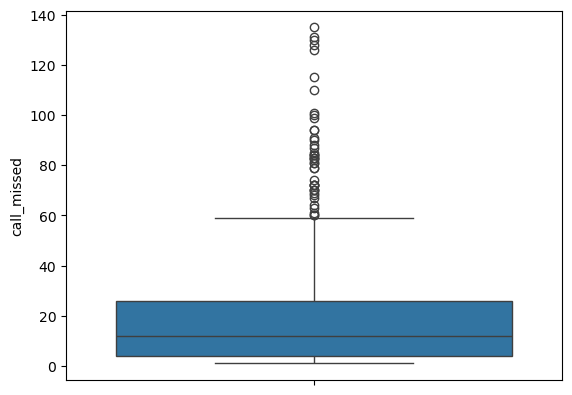

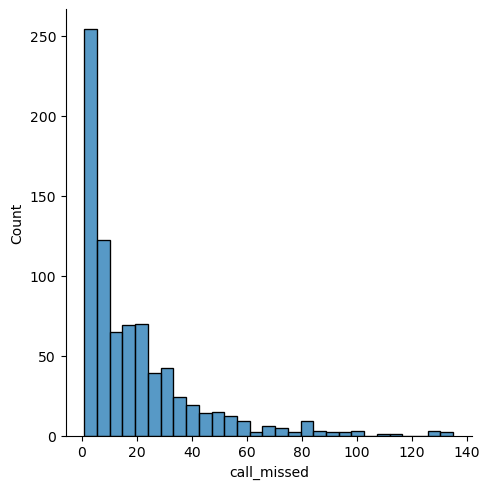

In [17]:
# Llamadas perdidas
media_llamadas_perdidas = df_merged['call_missed'].mean() # calcula la media aquí
variance = np.var(df_merged['call_missed']) # calcula la varianza aquí
standard_deviation = np.std(df_merged['call_missed']) # calcula la desviacion standar aqui
print('La media de las llamadas perdidas es: ',media_llamadas_perdidas)
print()
print('La desviacion standar de las llamadas perdidas es: ',standard_deviation)
print()
print('La varianza de las llamadas perdidas es: ',variance)
sns.boxplot(df_merged['call_missed'])
sns.displot(data=df_merged, x="call_missed")
print(df_merged['call_missed'])

La media de las llamadas perdidas nos da la pauta para conocer los operadores eficientes, con un tope de 19 llamadas al operador se le considerara eficiente, mas los operadores que pasen superen las 20 llamadas podran empezar a entrar en el campo de la ineficiencia, mientras mas alto el numero es mayor la ineficiencia del operador, donde encontramos bastantes operadores con mas de 40 llamadas perdidas en adelante, hasta con un maximo de de 135 llamadas perdidas.

El limite considerado para determinar la ineficiencia del los operadores es en base al cuartil del 75% en la grafica de caja

In [18]:
operators_ineff_call_missed = df_merged[df_merged['call_missed'] > 39]
print(operators_ineff_call_missed.sort_values(by='call_missed'))

    operator_id  call_missed  longtime_wait  calls_maked
695    904038.0           40            179           95
696    891158.0           40            109          108
697    945302.0           40             82           81
698    918452.0           40            102           43
699    945296.0           41             81           80
..          ...          ...            ...          ...
790    891414.0          126            277          158
791    901880.0          128            335          187
792    893804.0          130            325          181
793    891410.0          131            290          164
794    885876.0          135            319          214

[100 rows x 4 columns]


La media de las llamadas con larga espera es de:  53.231446540880505

La desviacion standar de las llamadas con larga espera es de:  58.50346884126599

La varianza de las llamadas con larga espera es de:  3422.6558664609806
0        2
1        2
2        5
3        2
4        2
      ... 
790    277
791    335
792    325
793    290
794    319
Name: longtime_wait, Length: 795, dtype: int64


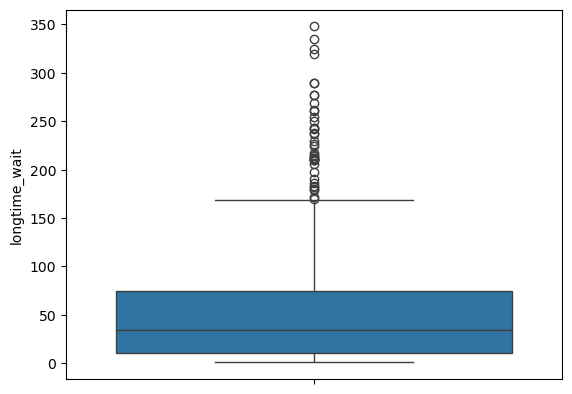

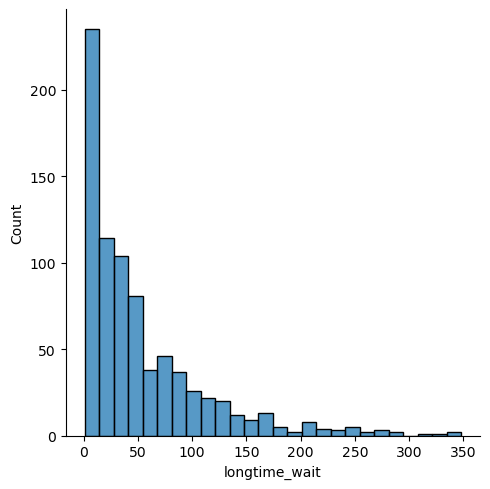

In [19]:
# Llamadas con largo tiempo de espera
media_llamadas_larga_espera = df_merged['longtime_wait'].mean() # calcula la media aquí
variance = np.var(df_merged['longtime_wait']) # calcula la varianza aquí
standard_deviation = np.std(df_merged['longtime_wait']) # calcula la desviacion standar aqui
print('La media de las llamadas con larga espera es de: ',media_llamadas_larga_espera)
print()
print('La desviacion standar de las llamadas con larga espera es de: ',standard_deviation)
print()
print('La varianza de las llamadas con larga espera es de: ',variance)
sns.boxplot(df_merged['longtime_wait'])
sns.displot(data=df_merged, x="longtime_wait")
print(df_merged['longtime_wait'])

La media de las llamadas con largo tiempo de espera nos da la pauta para conocer los operadores eficientes, con un tope de 53 segundos, ya que nadie esperaria 53 minutos, para contestar una llamada al operador se le considerara eficiente, mas los operadores que pasen superen los 53 segundos podran empezar a entrar en el campo de la ineficiencia, mientras mas alto el numero es mayor la ineficiencia del operador, donde encontramos varios operadores que tardan mucho mas que eso para contestar una llamada, hasta con un maximo de 350 segundos lo que es igual a una espera de hasta 7 minutos. Tomando esto en consideracion los operadores ineficientes serian todos aquellos que superen los 80 segundos para atender la llamada

El limite considerado para determinar la ineficiencia del los operadores es en base al cuartil del 75% en la grafica de caja

In [20]:
operators_ineff_longtime_wait = df_merged[df_merged['longtime_wait'] > 79]
print(operators_ineff_longtime_wait.sort_values(by='longtime_wait'))

    operator_id  call_missed  longtime_wait  calls_maked
537    920838.0           22             80           53
619    951508.0           29             80           12
647    939224.0           32             80           63
602    905870.0           27             81           49
615    940442.0           28             81           52
..          ...          ...            ...          ...
793    891410.0          131            290          164
794    885876.0          135            319          214
792    893804.0          130            325          181
791    901880.0          128            335          187
789    901884.0          115            348          182

[184 rows x 4 columns]


La media de las llamadas realizadas es de:  19.20754716981132

La desviacion standar de las llamadas realizadas es de:  37.411552305088186

La varianza de las llamadas realizadas es de:  1399.624245876349
0        2
1        1
2        4
3        2
4        2
      ... 
790    158
791    187
792    181
793    164
794    214
Name: calls_maked, Length: 795, dtype: int64


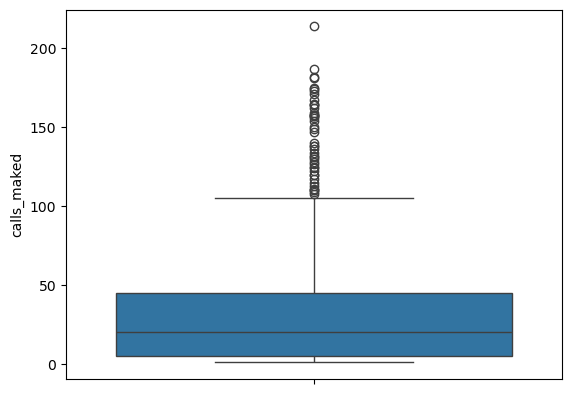

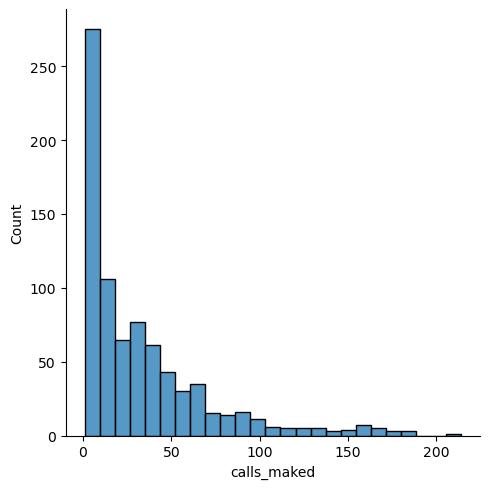

In [21]:
# Llamadas realizadas
media_llamadas_realizadas = df_merged['calls_maked'].mean() # calcula la media aquí
variance = np.var(df_merged['calls_maked']) # calcula la varianza aquí
standard_deviation = np.std(df_merged['calls_maked']) # calcula la desviacion standar aqui
print('La media de las llamadas realizadas es de: ',media_llamadas_perdidas)
print()
print('La desviacion standar de las llamadas realizadas es de: ',standard_deviation)
print()
print('La varianza de las llamadas realizadas es de: ',variance)
sns.boxplot(df_merged['calls_maked'])
sns.displot(data=df_merged, x="calls_maked")
print(df_merged['calls_maked'])

La media de las llamadas realizadas nos ayuda identificar los operadores eficientes, con un tope de 19 llamadas en adelanteal operador se le considerara eficiente, mas los operadores que pasen superen los no lleguen a dicho numero, podran empezar a considerarse en el campo de la ineficiencia, mientras mas bajo sea el numero es mayor la ineficiencia del operador, donde encontramos varios operadores que hacen muy pocas llamadas, hasta con un minimo de 1. Tomando esto en consideracion los operadores ineficientes serian todos aquellos que hagan menos de 10 llamadas. Este limite para dertrminar la ineficiencia del los operadores es en base al cuartil del 25% en la grafica de caja.

In [22]:
operators_ineff_calls_maked = df_merged[df_merged['calls_maked'] < 10]
print(operators_ineff_calls_maked.sort_values(by='calls_maked'))

    operator_id  call_missed  longtime_wait  calls_maked
1      954318.0            1              2            1
39     945074.0            1              1            1
6      891918.0            1              8            1
607    907970.0           27             91            1
48     914626.0            1              1            1
..          ...          ...            ...          ...
242    910524.0            5             10            9
64     930910.0            1             11            9
435    951506.0           14             62            9
461    940630.0           16             64            9
600    907182.0           26            126            9

[275 rows x 4 columns]


#### Establecimiento y prueba de las hipotesis, en base a lo que se nos pidio analizar las hipotesis que se implementan son:
##### Hipotesis nula: La mayoria de los operadores son ineficientes 
##### Hipotesis alternativa: La mayoria de los operadores son eficientes
Las pruebas de hipotesis se realizaran en cada uno de los rubros que se pidio analizar. llamaddas perdidas, tiempo de espera y llamadas realizadas

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente integración y análisis final. Lograste unir los conjuntos de datos de forma coherente, aplicar criterios estadísticos sólidos y derivar conclusiones lógicas sobre la eficiencia operativa. La metodología es clara y consistente.  
</div>


In [23]:
# LLamadas perdidas
from scipy.stats import levene
import numpy as np

operators_ineff_call_missed = df_merged[df_merged['call_missed'] > 39]
operators_eff_call_missed = df_merged[df_merged['call_missed'] < 20]

# Realizar la prueba de Levene
est_estadistico, p_valor = levene(operators_ineff_call_missed['call_missed'], operators_eff_call_missed['call_missed'])

# Imprimir resultados
print("Estadístico de Levene:", est_estadistico)
print("P-valor:", p_valor)

# Interpretar el resultado
alpha = 0.05  # Nivel de significancia
if p_valor < alpha:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales por lo que el valor a utilizar en equal_var es False")
else:
    print("No rechazamos la hipótesis nula: Las varianzas son iguales por lo que el valor a utilizar en equal_var es True")
print()

from scipy import stats as st
import numpy as np

print('Media operators_inefficient:', operators_ineff_call_missed['call_missed'].mean(), ' - Desviación estándar:', operators_ineff_call_missed['call_missed'].std())
print('Media operators_efficient:', operators_eff_call_missed['call_missed'].mean(), ' - Desviación estándar:', operators_eff_call_missed['call_missed'].std())

estadistico, pvalue = st.ttest_ind(operators_ineff_call_missed['call_missed'], operators_eff_call_missed['call_missed'], equal_var=True)
alpha = 0.05
if pvalue < alpha:
    print('Se rechaza la hipotesis nula: La mayoria de los operadores son eficientes')
elif pvalue >= alpha:
    print('No se puede rechazar la hipotesis nula: Los mayoria de los operadores son ineficientes')

Estadístico de Levene: 227.5049829111193
P-valor: 6.677056008163385e-44
Rechazamos la hipótesis nula: Las varianzas no son iguales por lo que el valor a utilizar en equal_var es False

Media operators_inefficient: 65.46  - Desviación estándar: 23.170174140410982
Media operators_efficient: 7.064705882352941  - Desviación estándar: 5.471997782940667
Se rechaza la hipotesis nula: La mayoria de los operadores son eficientes


In [24]:
# tiempo largo de espera

operators_ineff_longtime_wait = df_merged[df_merged['longtime_wait'] > 79]
operators_eff_longtime_wait = df_merged[df_merged['longtime_wait'] < 53]

# Realizar la prueba de Levene
est_estadistico, p_valor = levene(operators_ineff_longtime_wait['longtime_wait'], operators_eff_longtime_wait['longtime_wait'])

# Imprimir resultados
print("Estadístico de Levene:", est_estadistico)
print("P-valor:", p_valor)

# Interpretar el resultado
alpha = 0.05  # Nivel de significancia
if p_valor < alpha:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales por lo que el valor a utilizar en equal_var es False")
else:
    print("No rechazamos la hipótesis nula: Las varianzas son iguales por lo que el valor a utilizar en equal_var es True")
print()

from scipy import stats as st
import numpy as np

print('Media operators_inefficient:', operators_ineff_longtime_wait['longtime_wait'].mean(), ' - Desviación estándar:', operators_ineff_longtime_wait['longtime_wait'].std())
print('Media operators_efficient:', operators_eff_longtime_wait['longtime_wait'].mean(), ' - Desviación estándar:', operators_eff_longtime_wait['longtime_wait'].std())

estadistico, pvalue = st.ttest_ind(operators_ineff_longtime_wait['longtime_wait'], operators_eff_longtime_wait['longtime_wait'], equal_var=False)
alpha = 0.05
if pvalue < alpha:
    print('Se rechaza la hipotesis nula: La mayoria de los operadores son eficientes')
elif pvalue >= alpha:
    print('No se puede rechazar la hipotesis nula: Los mayoria de los operadores son ineficientes')

Estadístico de Levene: 217.10976940849233
P-valor: 4.8231021502139664e-43
Rechazamos la hipótesis nula: Las varianzas no son iguales por lo que el valor a utilizar en equal_var es False

Media operators_inefficient: 140.05978260869566  - Desviación estándar: 58.96782221502745
Media operators_efficient: 20.685114503816795  - Desviación estándar: 15.378528144875691
Se rechaza la hipotesis nula: La mayoria de los operadores son eficientes


In [25]:
# Llamadas realizadas

operators_ineff_calls_maked= df_merged[df_merged['calls_maked'] > 39]
operators_eff_calls_maked = df_merged[df_merged['calls_maked'] < 20]

# Realizar la prueba de Levene
est_estadistico, p_valor = levene(operators_ineff_calls_maked['calls_maked'], operators_eff_calls_maked['calls_maked'])

# Imprimir resultados
print("Estadístico de Levene:", est_estadistico)
print("P-valor:", p_valor)

# Interpretar el resultado
alpha = 0.05  # Nivel de significancia
if p_valor < alpha:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales por lo que debes usar True si la diferencia es mayor o False si es menor en equal_var")
else:
    print("No rechazamos la hipótesis nula: Las varianzas son iguales por lo que el valor a utilizar en equal_var es True")
print()

from scipy import stats as st
import numpy as np

print('Media operators_inefficient:', operators_ineff_calls_maked['calls_maked'].mean(), ' - Desviación estándar:', operators_ineff_calls_maked['calls_maked'].std())
print('Media operators_efficient:', operators_eff_calls_maked['calls_maked'].mean(), ' - Desviación estándar:', operators_eff_calls_maked['calls_maked'].std())

estadistico, pvalue = st.ttest_ind(operators_ineff_calls_maked['calls_maked'], operators_eff_calls_maked['calls_maked'], equal_var=False)
alpha = 0.05
if pvalue < alpha:
    print('Se rechaza la hipotesis nula: La mayoria de los operadores son eficientes')
elif pvalue >= alpha:
    print('No se puede rechazar la hipotesis nula: Los mayoria de los operadores son ineficientes')

Estadístico de Levene: 233.88746863527902
P-valor: 3.910695615973526e-45
Rechazamos la hipótesis nula: Las varianzas no son iguales por lo que debes usar True si la diferencia es mayor o False si es menor en equal_var

Media operators_inefficient: 77.97083333333333  - Desviación estándar: 37.8483428130738
Media operators_efficient: 6.9311224489795915  - Desviación estándar: 5.366167650998727
Se rechaza la hipotesis nula: La mayoria de los operadores son eficientes


In [26]:
print('Total de operadores: ',telecom_dataset_clean['operator_id'].nunique())
print('Operadores ineficientes con llamdas perdidas: ', operators_ineff_call_missed['operator_id'].nunique())
percent_oper_ineff_call_missed = (operators_ineff_call_missed['operator_id'].nunique() / telecom_dataset_clean['operator_id'].nunique())*100
print('Porcentaje de operadores ineficientes por llamadas perdidas: ',percent_oper_ineff_call_missed)
print()
print('Operadores ineficientes por llamadas con largo tiempo de espera: ', operators_ineff_longtime_wait['operator_id'].nunique())
percent_oper_ineff_longtime_wait = (operators_ineff_longtime_wait['operator_id'].nunique() / telecom_dataset_clean['operator_id'].nunique())*100
print('Porcentaje de operadores ineficientes por llamadas perdidas: ',percent_oper_ineff_longtime_wait)
print()
print('Operadores ineficientes con bajo numero de llamadas realizadas', operators_ineff_calls_maked['operator_id'].nunique())
percent_oper_ineff_calls_maked = (operators_ineff_calls_maked['operator_id'].nunique() / telecom_dataset_clean['operator_id'].nunique())*100
print('Porcentaje de operadores ineficientes por llamadas perdidas: ',percent_oper_ineff_calls_maked)

Total de operadores:  1093
Operadores ineficientes con llamdas perdidas:  100
Porcentaje de operadores ineficientes por llamadas perdidas:  9.149130832570906

Operadores ineficientes por llamadas con largo tiempo de espera:  184
Porcentaje de operadores ineficientes por llamadas perdidas:  16.834400731930465

Operadores ineficientes con bajo numero de llamadas realizadas 240
Porcentaje de operadores ineficientes por llamadas perdidas:  21.957913998170174


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buena aplicación de pruebas estadísticas. La comparación entre grupos mediante Levene y t-test está correctamente planteada, con una interpretación adecuada de los valores p y un cierre cuantitativo claro sobre la eficiencia operativa. Trabajo sólido y bien sustentado.  
</div>


## Conclusiones y recomendaciones:
1. De un total de 1093 operadores se idenfican los siguientes porcentajes 9.14% de operadores son ineficientes en llamadas perdidas
16.83% de los operadores son ineficientes en largos tiempos de espera y un 21.96% hacen pocas llamadas, y no necesariamente son los mismos que fallan en las 3 cosas, pueden ser fuertes en uno de los rubros y fallar en otro.
2. Algo que es notable con el caso de los operadores que tienen altos indices de falla en llamadas perdidas y largo tiempo de espera es que hacen muchas llamadas, incluso los podriamos considerar en el top de los que mas llamadas hacen ¿Sera que existe algun problema en la canalizacion de las llamadas hacia estos operadores o son ellos los que jalan las llamadas?
3. Es necesario revisar con sistemas el adecuado registro en el conteo de las llamadas, pues se identificaron poco mas de 8 mil llamadas con un valor vacio sobre el operador que atendio dicha llamada, estos registros si presentaron informacion en llamadas recibidas, tiempo de espera y llamadas realizadas, mas no en el id del operador, lo que significa que las llamadas si fueron atendidas, esto significa que un 15% de los registros de las llamadas presentan dicho problema.
4. Es importante revisar el funcionamiento del sistema vs la forma de trabajo de los operadores, ya que tambien es notable que los operadores que se pueden considerar eficientes con bajos niveles de llamadas perdidas y tiempos de espera cortos, tienen un bajo indice de llamadas realizadas.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente cierre analítico. Las conclusiones muestran una comprensión profunda de los resultados estadísticos y una capacidad crítica para relacionar hallazgos técnicos con posibles causas operativas. Las recomendaciones son pertinentes y demuestran enfoque profesional en la interpretación de los datos.  
</div>


# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente dominio en el manejo de datos, desde la limpieza y enriquecimiento hasta el análisis estadístico y la interpretación de resultados.  

#### Puntos Positivos:

* **Procesamiento de datos:** Realizaste una depuración precisa, manejando correctamente los valores nulos y la tipificación de variables.
* **Análisis exploratorio y estadístico:** Aplicaste métricas y pruebas adecuadas (Levene, t-test) con una interpretación coherente y sustentada.
* **Visualización y razonamiento analítico:** Tus gráficos, medidas de tendencia y varianza se integran bien con las conclusiones.
* **Conclusiones y recomendaciones:** Presentaste observaciones realistas, enfocadas en la eficiencia operativa y con sugerencias relevantes para la toma de decisiones.

Tu trabajo refleja un enfoque estructurado y un pensamiento crítico sólido. Muy buen desempeño en todas las etapas del análisis.

</div>
